In [27]:
from pandas import read_csv
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = read_csv('Boston.csv', index_col=0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [28]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [29]:
np.corrcoef(df['indus'], df['nox'])

array([[1.        , 0.76365145],
       [0.76365145, 1.        ]])

In [7]:
X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']].values
y = df['medv'].values
X.shape, y.shape

((506, 13), (506,))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((379, 13), (379,), (127, 13), (127,))

In [ ]:
lg = LinearRegression()
lg.fit(X_train, y_train)

#https://www.kaggle.com/datasets?tags=13405-Linear+Regression

LinearRegression()

In [25]:
lg.coef_

array([-1.35876898e-01,  4.43662632e-02,  4.31065198e-02,  4.48191969e+00,
       -2.08369287e+01,  3.81621253e+00,  1.94084589e-03, -1.45847441e+00,
        3.40803077e-01, -1.05889853e-02, -8.24838582e-01,  1.04526717e-02,
       -5.40209319e-01])

In [12]:
lg.score(X_train, y_train), lg.score(X_test, y_test)

(0.7226065998796622, 0.7656496563338301)

In [16]:
y_pred = lg.predict(X_test)

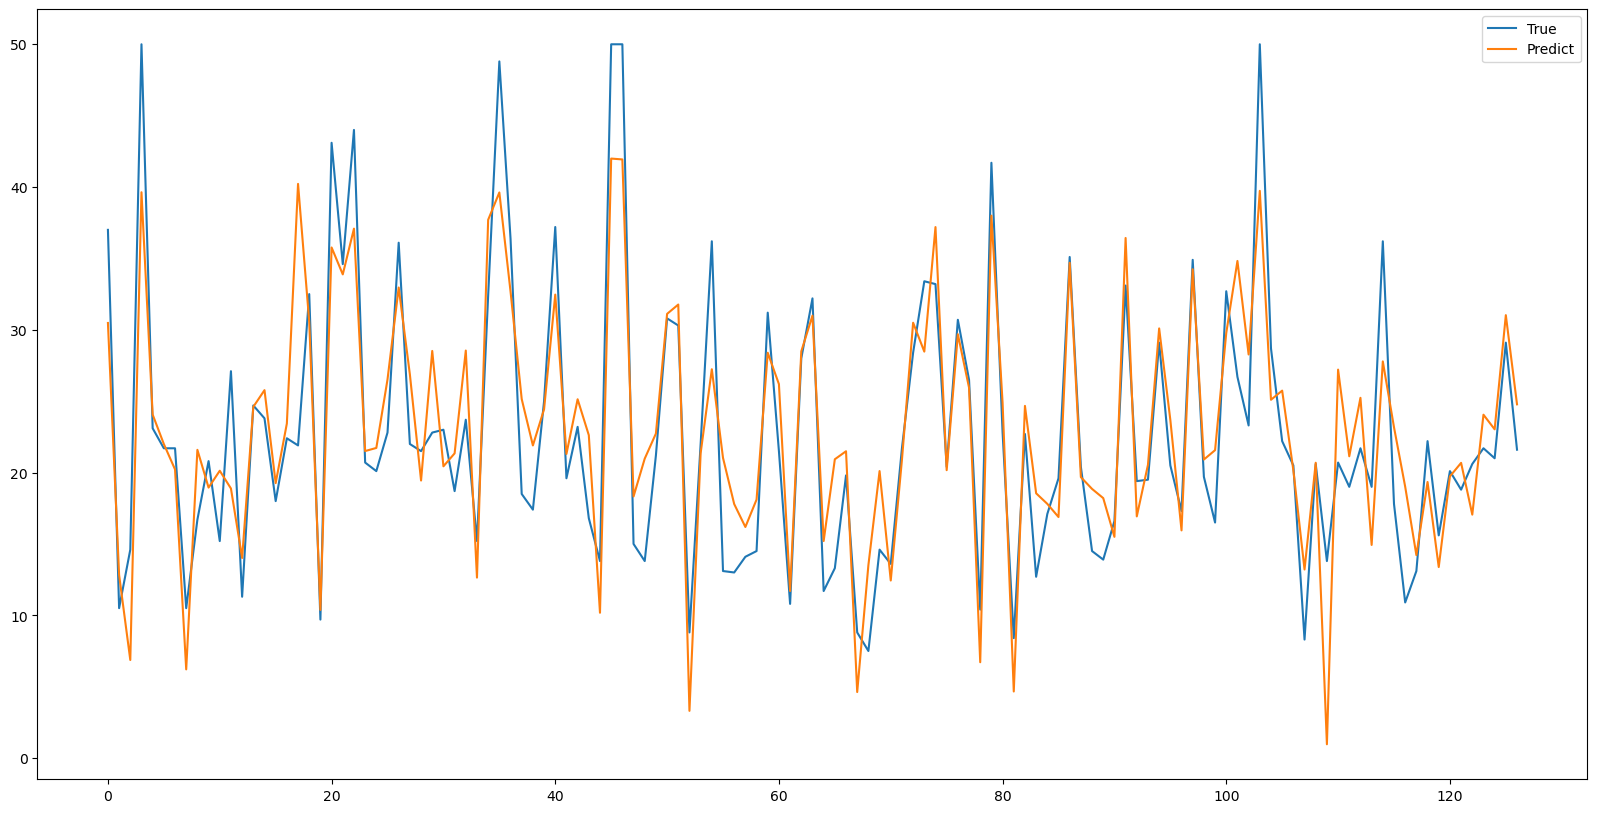

In [23]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot(y_test)

plt.plot(y_pred)
plt.legend(['True', 'Predict'])
plt.show()

In [20]:
y_pred

array([30.47738441, 12.82618597,  6.86897043, 39.63421221, 24.06016114,
       21.99753305, 20.21860423,  6.21219778, 21.59214509, 18.94633812,
       20.12607389, 18.88243943, 14.01506005, 24.60292135, 25.7723925 ,
       19.25989101, 23.43586215, 40.22032813, 30.56830407, 10.37610376,
       35.76650913, 33.8816008 , 37.08448241, 21.50576474, 21.72403611,
       26.52219111, 32.96095357, 26.8728611 , 19.44151064, 28.51825374,
       20.43631453, 21.3433622 , 28.54598468, 12.64047039, 37.70435332,
       39.61974297, 32.69209516, 25.14808474, 21.89920693, 24.43528099,
       32.46519661, 21.30338013, 25.13315229, 22.61939076, 10.17891528,
       41.99392565, 41.93361418, 18.32445075, 20.97400669, 22.73075054,
       31.11499126, 31.76870542,  3.30672353, 21.35677649, 27.23544297,
       21.02785999, 17.79550287, 16.18572983, 18.10615575, 28.39364884,
       26.19422331, 11.70036687, 28.49148976, 30.99363484, 15.20325673,
       20.93057446, 21.49185448,  4.62501122, 13.51098595, 20.10

In [24]:
y_test

array([37. , 10.5, 14.6, 50. , 23.1, 21.7, 21.7, 10.5, 16.7, 20.8, 15.2,
       27.1, 11.3, 24.7, 23.8, 18. , 22.4, 21.9, 32.5,  9.7, 43.1, 34.6,
       44. , 20.7, 20.1, 22.8, 36.1, 22. , 21.5, 22.8, 23. , 18.7, 23.7,
       15.2, 32.4, 48.8, 36.4, 18.5, 17.4, 25. , 37.2, 19.6, 23.2, 16.8,
       13.8, 50. , 50. , 15. , 13.8, 21.2, 30.8, 30.3,  8.8, 22. , 36.2,
       13.1, 13. , 14.1, 14.5, 31.2, 21.5, 10.8, 28. , 32.2, 11.7, 13.3,
       19.8,  8.8,  7.5, 14.6, 13.6, 21.7, 28.4, 33.4, 33.2, 20.4, 30.7,
       26.5, 10.4, 41.7, 22.8,  8.4, 22.7, 12.7, 17.1, 19.6, 35.1, 20.4,
       14.5, 13.9, 16.6, 33.1, 19.4, 19.5, 29.1, 20.5, 17.3, 34.9, 19.7,
       16.5, 32.7, 26.7, 23.3, 50. , 28.7, 22.2, 20.5,  8.3, 20.6, 13.8,
       20.7, 19. , 21.7, 19. , 36.2, 17.8, 10.9, 13.1, 22.2, 15.6, 20.1,
       18.8, 20.6, 21.7, 21. , 29.1, 21.6])